Nama  : Dea Putri Nastit

NIM   : 2241720117

Kelas : TI-3E

# Praktikum 1

**KMeans**

KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah k yang dipilih. Proses KMeans secara manual, dapat dilihat pada tautan berikut,

Perhitungan Manual KMeans

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/machine learning/js6/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- import pandas as pd:

  Mengimpor library pandas dan memberikan alias pd. Pandas digunakan untuk manipulasi dan analisis data, terutama dalam bentuk DataFrame.

- import numpy as np:

  Mengimpor library numpy dan memberikan alias np. NumPy digunakan untuk operasi numerik dan array multidimensi.

- import matplotlib.pyplot as plt:

  Mengimpor modul pyplot dari library matplotlib dan memberikan alias plt.Matplotlib digunakan untuk membuat visualisasi data, seperti grafik.

- from sklearn.cluster import KMeans:

  Mengimpor class KMeans dari modul cluster di library sklearn. KMeans digunakan untuk melakukan clustering data dengan algoritma K-Means.

- pd.read_csv() adalah fungsi Pandas untuk membaca data dari file CSV.

- df.head():

  Menampilkan 5 baris pertama dari DataFrame df.

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- X = df.iloc[:, 1:-1]:

  - df.iloc: Digunakan untuk mengakses data dalam DataFrame berdasarkan indeks posisi (integer).
  - [:, 1:-1]: Memilih semua baris (:) dan kolom dari indeks 1 hingga indeks terakhir dikurangi 1 (1:-1).
  - Artinya, X akan berisi semua kolom kecuali kolom pertama dan terakhir dari DataFrame df. Ini diasumsikan sebagai fitur-fitur yang akan digunakan untuk clustering.

- y = df.iloc[:, -1]:

  - [:, -1]: Memilih semua baris (:) dan kolom terakhir (-1).
  - Artinya, y akan berisi data dari kolom terakhir DataFrame df. Ini diasumsikan sebagai target atau label untuk setiap data point.

- X.head():

  - Menampilkan 5 baris pertama dari DataFrame X (data fitur). Ini berguna untuk melihat sekilas data yang telah dipilih.

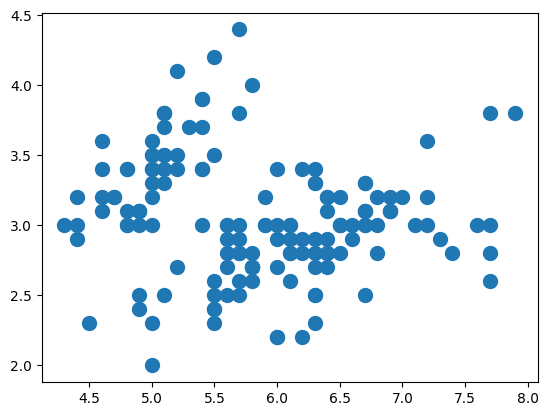

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

- plt.scatter(): Fungsi untuk membuat scatter plot.
- X.iloc[:, 0]: Mengambil semua baris (:) dan kolom pertama (0) dari DataFrame X sebagai data untuk sumbu x.
- X.iloc[:, 1]: Mengambil semua baris (:) dan kolom kedua (1) dari DataFrame X sebagai data untuk sumbu y.
- s = 100: Menentukan ukuran marker (titik-titik pada scatter plot) menjadi 100.

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

- from sklearn.cluster import KMeans:

  - Mengimpor class KMeans dari library sklearn.cluster. Class ini digunakan untuk membuat model K-Means clustering.

- cl_kmeans = KMeans(n_clusters=2):

  - Membuat objek KMeans bernama cl_kmeans dengan parameter n_clusters=2.
  - n_clusters=2: Menentukan jumlah cluster yang diinginkan, dalam hal ini 2 cluster.

- y_kmeans = cl_kmeans.fit_predict(X):

  - Melakukan training (fitting) model K-Means pada data fitur X dan sekaligus memprediksi cluster untuk setiap data point.
  - fit_predict(): Metode yang menggabungkan proses fitting dan prediksi.
  - Hasil prediksi (cluster label untuk setiap data point) disimpan dalam variabel y_kmeans.

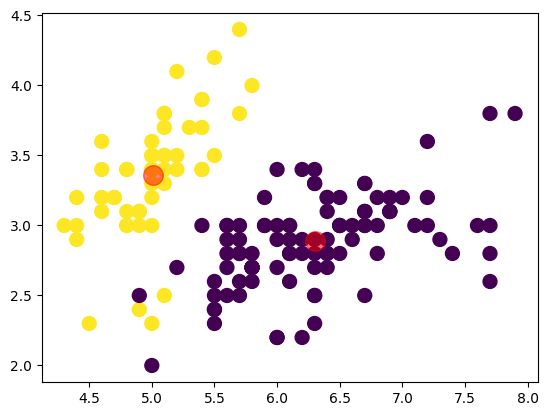

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

1. plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100, c=y_kmeans)
  - plt.scatter(): Fungsi untuk membuat scatter plot.
  - X.iloc[:, 0] dan X.iloc[:, 1]: Mengambil data dari kolom pertama dan kedua DataFrame X untuk sumbu x dan y.
  - s=100: Menentukan ukuran marker untuk data points menjadi 100.
  - c=y_kmeans: Memberikan warna pada data points berdasarkan cluster label yang ada di y_kmeans. Data point dengan cluster yang sama akan memiliki warna yang sama.

2. centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
  - centers = cl_kmeans.cluster_centers_: Mengambil koordinat centroid dari model K-Means yang telah dilatih dan menyimpannya dalam variabel centers.
  - plt.scatter(): Fungsi untuk membuat scatter plot, kali ini untuk centroid.
  - centers[:, 0] dan centers[:, 1]: Mengambil koordinat x dan y dari centers untuk plotting.
  - c='red': Memberikan warna merah pada centroid.
  - s=200: Menentukan ukuran marker untuk centroid menjadi 200.
  - alpha=0.5: Menentukan transparansi centroid menjadi 0.5 (setengah transparan).

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


1. print(f'Nilai SSE: {cl_kmeans.inertia_}'):
  - print(): Fungsi untuk menampilkan output ke layar.
  - f'...': f-string, digunakan untuk format string dan memasukkan nilai variabel ke dalam string.
  - Nilai SSE:: Teks yang akan ditampilkan sebelum nilai SSE.
  - {cl_kmeans.inertia_}: Placeholder untuk nilai SSE yang diambil dari atribut inertia_ dari objek cl_kmeans
  (model K-Means).

Inertia (SSE):

Inertia adalah jumlah kuadrat jarak antara setiap data point dengan centroid clusternya. Nilai inertia yang rendah menunjukkan bahwa data point dalam cluster cenderung berdekatan satu sama lain, yang mengindikasikan clustering yang baik.

Nilai SSE 152.3687 menunjukkan bahwa masih ada variasi yang cukup besar di dalam cluster yang terbentuk.

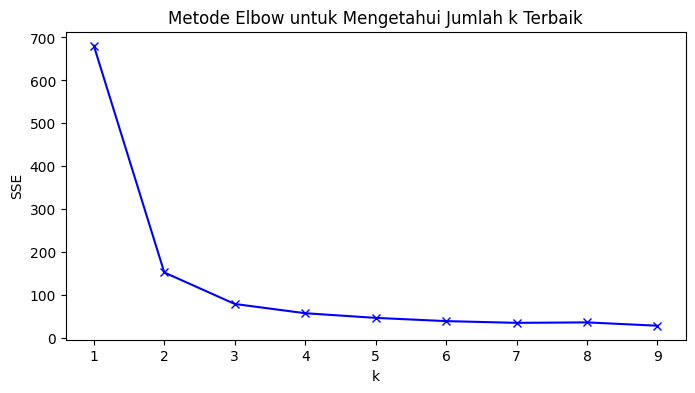

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

- sse = []:

  - Membuat list kosong bernama sse untuk menyimpan nilai SSE yang akan dihitung untuk setiap nilai k.

- K = range(1,10):

  - Membuat range nilai k dari 1 hingga 9 dan menyimpannya dalam variabel K.

- for k in K:

 kmeanModel = KMeans(n_clusters=k)

 kmeanModel.fit(X)

 sse.append(kmeanModel.inertia_)
  - for k in K::
    - Looping untuk setiap nilai k dalam K.
  - kmeanModel = KMeans(n_clusters=k):
    - Membuat objek KMeans dengan jumlah cluster (n_clusters) yang ditentukan oleh nilai k pada iterasi loop saat ini.
  - kmeanModel.fit(X):
    - Melatih model K-Means menggunakan data fitur X.
  - sse.append(kmeanModel.inertia_):
    - Mengambil nilai inertia (SSE) dari model yang telah dilatih dan menambahkannya ke list sse.

- plt.figure(figsize=(8,4)): Membuat figure (area plot) dengan ukuran 8x4 inci.
- plt.plot(K, sse, "bx-"):
  - Membuat line plot dengan:
    - Sumbu x: Nilai k (jumlah cluster) yang tersimpan dalam variabel K.
    - Sumbu y: Nilai SSE yang tersimpan dalam variabel sse.
    - "bx-": Format marker dan garis, yaitu:
      - b: Warna biru (blue).
      - x: Marker berbentuk 'x'.
      - -: Garis solid.
- plt.xlabel("k"): Memberikan label "k" pada sumbu x.
- plt.ylabel("SSE"): Memberikan label "SSE" pada sumbu y.
- plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik"):Memberikan judul pada plot.
- plt.show(): Menampilkan plot.

Plot Elbow Method menunjukkan penurunan nilai SSE seiring bertambahnya jumlah cluster (k). Titik "elbow" (siku) pada plot menunjukkan nilai k optimal, yaitu titik di mana penurunan SSE mulai melambat secara signifikan.

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.34540931571815
k=5; SSE=46.535582051282034
k=6; SSE=38.96478785103787
k=7; SSE=34.93427187750333
k=8; SSE=35.99093787878788
k=9; SSE=28.236864198814995


- for idx, sse_val in enumerate(sse, start=1)::
  - enumerate(sse, start=1): Fungsi enumerate akan menghasilkan pasangan indeks dan nilai dari list sse.
    - start=1: Menentukan bahwa indeks dimulai dari 1 (bukan 0 seperti default).
  - idx, sse_val: Pada setiap iterasi loop, idx akan menyimpan indeks (nilai k), dan sse_val akan menyimpan nilai SSE yang sesuai.
- print(f'k={idx}; SSE={sse_val}'):
  - Menampilkan output ke layar dengan format:
    - k=[nilai k]
    - SSE=[nilai SSE]

# Praktikum 2

Konsep K-Means untuk klasterisasi data

In [1]:
# import library

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

- import matplotlib.pyplot as plt:

    - Mengimpor modul pyplot dari library matplotlib dan memberikan alias plt. matplotlib.pyplot adalah kumpulan fungsi yang membuat matplotlib bekerja seperti MATLAB.pyplot digunakan untuk membuat berbagai jenis visualisasi data seperti grafik garis, scatter plot, histogram, dan sebagainya. Alias plt digunakan untuk mempermudah pemanggilan fungsi-fungsi dari pyplot.

- import seaborn as sns; sns.set():
  - Mengimpor library seaborn dan memberikan alias sns. seaborn dibangun di atas matplotlib dan menyediakan antarmuka tingkat tinggi untuk membuat grafik statistik yang informatif dan menarik secara visual.
  - sns.set() digunakan untuk mengatur tema visual default untuk plot seaborn. Tema ini memengaruhi tampilan plot seperti warna, font, dan gaya.

- import numpy as np:
  Mengimpor library numpy dan memberikan alias np. numpy adalah library fundamental untuk komputasi ilmiah di Python. numpy menyediakan struktur data array multidimensi yang efisien dan berbagai fungsi matematika untuk operasi pada array tersebut. Alias np digunakan untuk mempermudah pemanggilan fungsi-fungsi dari numpy.

**Pengantar k-Means**

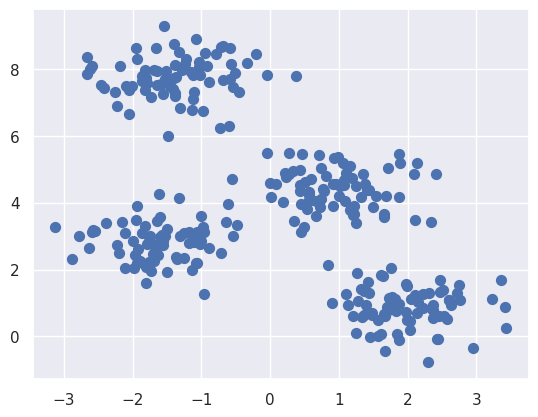

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

- from sklearn.datasets import make_blobs:
  Mengimpor fungsi make_blobs dari modul sklearn.datasets. Fungsi make_blobs digunakan untuk menghasilkan dataset sintetis berupa gumpalan data (blobs) dengan distribusi Gaussian isotropik. Dataset ini sering digunakan untuk tujuan demonstrasi dan pengujian algoritma clustering.

- X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0):
  - Memanggil fungsi make_blobs untuk membuat dataset.
  - n_samples=300: Menentukan jumlah sampel data yang akan dihasilkan, yaitu 300.
  - centers=4: Menentukan jumlah cluster atau pusat gumpalan data, yaitu 4.
  - cluster_std=0.60: Menentukan deviasi standar dari distribusi Gaussian untuk setiap cluster. Nilai yang lebih tinggi akan menghasilkan gumpalan data yang lebih tersebar.
  - random_state=0: Menentukan seed untuk generator angka acak, sehingga dataset yang dihasilkan akan konsisten setiap kali kode dijalankan.
  - Fungsi make_blobs mengembalikan dua nilai:
    - X: Array yang berisi data points, dengan setiap baris mewakili satu sampel dan setiap kolom mewakili satu fitur.
    - y_true: Array yang berisi label cluster sebenarnya untuk setiap sampel data.

- plt.scatter(X[:, 0], X[:, 1], s=50):
  - Memanggil fungsi scatter dari matplotlib.pyplot untuk membuat scatter plot.
  - X[:, 0]: Mengambil semua baris (:) dan kolom pertama (0) dari array X sebagai data untuk sumbu x.
  - X[:, 1]: Mengambil semua baris (:) dan kolom kedua (1) dari array X sebagai data untuk sumbu y.
  - s=50: Menentukan ukuran marker (titik-titik pada scatter plot) menjadi 50.
  - Fungsi scatter akan menampilkan scatter plot dari data points, di mana setiap titik mewakili satu sampel data dan posisinya ditentukan oleh nilai fitur pada sumbu x dan y.

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

- from sklearn.cluster import KMeans:

  Mengimpor kelas KMeans dari modul sklearn.cluster. Kelas KMeans digunakan untuk melakukan clustering data dengan algoritma K-Means. Algoritma ini bertujuan untuk mengelompokkan data points ke dalam sejumlah cluster berdasarkan jarak mereka ke centroid (pusat) cluster.

- kmeans = KMeans(n_clusters=4):

  - Membuat objek KMeans bernama kmeans dengan parameter n_clusters=4.
  - n_clusters=4: Menentukan jumlah cluster yang diinginkan, dalam hal ini 4 cluster. Ini sesuai dengan jumlah pusat gumpalan data yang dihasilkan oleh make_blobs sebelumnya.

- kmeans.fit(X):

  - Melakukan training (fitting) model K-Means pada data fitur X.
  - Metode fit akan menghitung posisi centroid cluster berdasarkan data points dalam X. Proses ini melibatkan iterasi hingga centroid konvergen, yaitu posisi centroid tidak berubah secara signifikan.

- y_kmeans = kmeans.predict(X):

  - Memprediksi label cluster untuk setiap data point dalam X menggunakan model K-Means yang telah dilatih.
  - Metode predict akan menetapkan setiap data point ke cluster terdekat berdasarkan jaraknya ke centroid cluster.
  - Hasil prediksi (label cluster untuk setiap data point) disimpan dalam variabel y_kmeans.

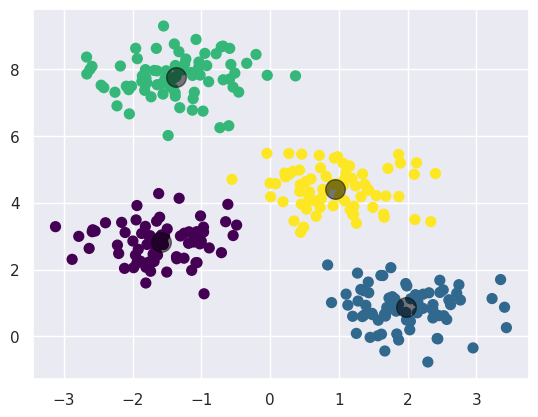

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

- plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis'):

  - Membuat scatter plot dari data points dalam X, dengan memberikan warna pada data points berdasarkan label cluster (y_kmeans).
  - X[:, 0] dan X[:, 1]: Mengambil data dari kolom pertama dan kedua array X untuk sumbu x dan y, sama seperti sebelumnya.
 - c=y_kmeans: Memberikan warna pada data points berdasarkan label cluster yang ada di y_kmeans. Data point dengan cluster yang sama akan memiliki warna yang sama.
  - s=50: Menentukan ukuran marker untuk data points menjadi 50.
  - cmap='viridis': Menentukan colormap yang digunakan untuk memetakan label cluster ke warna. 'viridis' adalah colormap default di matplotlib dan memberikan rentang warna yang beragam.

- centers = kmeans.cluster_centers_:

  - Mengambil koordinat centroid dari model K-Means yang telah dilatih dan menyimpannya dalam variabel centers.
  - cluster_centers_ adalah atribut dari objek kmeans yang menyimpan koordinat centroid.

- plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5):

  - Membuat scatter plot untuk centroid cluster, dengan warna hitam, ukuran marker 200, dan transparansi 0.5.
  - centers[:, 0] dan centers[:, 1]: Mengambil koordinat x dan y dari centers untuk plotting.
  - c='black': Memberikan warna hitam pada centroid.
  - s=200: Menentukan ukuran marker untuk centroid menjadi 200.
  - alpha=0.5: Menentukan transparansi centroid menjadi 0.5 (setengah transparan).

**Algoritma Expectation-Maximization**

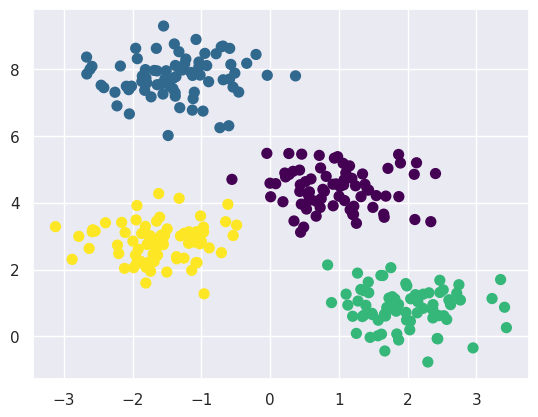

In [5]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

- from sklearn.metrics import pairwise_distances_argmin:
  - Mengimpor fungsi pairwise_distances_argmin dari modul sklearn.metrics. Fungsi ini digunakan untuk menemukan indeks elemen minimum dalam setiap baris matriks jarak berpasangan. Ini akan digunakan nanti dalam kode untuk menetapkan data points ke cluster terdekat.

- def find_clusters(X, n_clusters, rseed=2)::
  - Mendefinisikan fungsi find_clusters yang mengambil tiga argumen:
  - X: Data points yang akan di-cluster.
  - n_clusters: Jumlah cluster yang diinginkan.
  - rseed=2: Seed untuk generator angka acak, digunakan untuk memastikan hasil yang konsisten.

- rng = np.random.RandomState(rseed):
  - Membuat objek RandomState dari numpy.random dengan seed yang ditentukan (rseed). Objek ini digunakan untuk menghasilkan angka acak dengan cara yang dapat direproduksi.

- i = rng.permutation(X.shape[0])[:n_clusters]:
  - Mengacak indeks baris data points (X.shape[0]) menggunakan rng.permutation.
  - Memilih n_clusters indeks pertama dari indeks yang telah diacak dan menyimpannya dalam variabel i.
  - Indeks ini akan digunakan untuk memilih data points sebagai centroid cluster awal.

- centers = X[i]:
  - Memilih data points dari X berdasarkan indeks yang tersimpan di i dan menyimpannya dalam variabel centers. centers sekarang berisi centroid cluster awal yang dipilih secara acak.

- while True::
  - Memulai loop tak terbatas yang akan berjalan hingga kondisi break terpenuhi. Loop ini merupakan inti dari algoritma K-Means, di mana centroid cluster diperbarui secara iteratif hingga konvergen.

- labels = pairwise_distances_argmin(X, centers):
  - Menetapkan setiap data point ke cluster terdekat berdasarkan jaraknya ke centroid cluster.
  - pairwise_distances_argmin(X, centers) menghitung jarak antara setiap data point dalam X dengan setiap centroid dalam centers, dan mengembalikan indeks centroid terdekat untuk setiap data point.
  - Hasilnya disimpan dalam variabel labels, yang berisi label cluster untuk setiap data point.

- new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)]):
  - Menghitung centroid baru untuk setiap cluster berdasarkan data points yang telah ditetapkan ke cluster tersebut.
  - X[labels == i] memilih data points yang memiliki label cluster i.
.mean(0) menghitung rata-rata dari data points tersebut di sepanjang sumbu 0 (kolom), menghasilkan koordinat centroid baru.
  - Hasilnya disimpan dalam array new_centers, yang berisi centroid baru untuk setiap cluster.

- if np.all(centers == new_centers): break:
  - Memeriksa apakah centroid baru sama dengan centroid sebelumnya.
  - np.all(centers == new_centers) mengembalikan True jika semua elemen dalam centers sama dengan elemen yang sesuai dalam new_centers.
  - Jika centroid tidak berubah (konvergen), loop akan dihentikan dengan pernyataan break.

- centers = new_centers:
  - Memperbarui centroid dengan centroid baru.

- return centers, labels:
  - Mengembalikan centroid akhir dan label cluster untuk setiap data point.

- centers, labels = find_clusters(X, 4):
  - Memanggil fungsi find_clusters dengan data points (X) dan jumlah cluster (4) untuk mendapatkan centroid dan label cluster.

- plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'):
  - Membuat scatter plot dari data points, dengan memberikan warna pada data points berdasarkan label cluster (labels).
  - cmap='viridis' digunakan untuk memetakan label cluster ke warna.


**Perubahaan random**

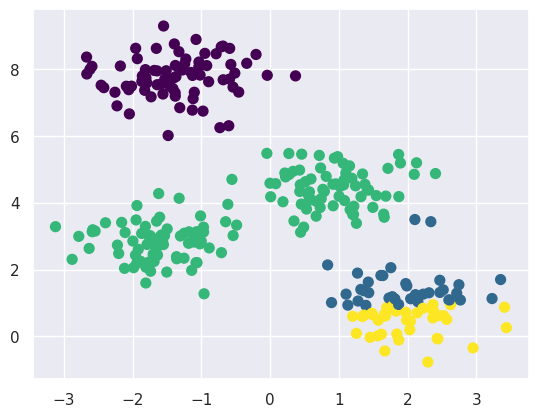

In [6]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

- centers, labels = find_clusters(X, 4, rseed=0):

  - Memanggil fungsi find_clusters dengan data points (X), jumlah cluster (4), dan seed untuk generator angka acak (rseed=0).
  - Perubahan utama di sini adalah penggunaan rseed=0, yang akan menghasilkan hasil clustering yang berbeda dari sebelumnya karena centroid cluster awal akan dipilih secara acak dengan seed yang berbeda.

- plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'):

  - Membuat scatter plot dari data points, dengan memberikan warna pada data points berdasarkan label cluster (labels).
  - cmap='viridis' digunakan untuk memetakan label cluster ke warna.

**Optimalisasi Jumlah Klaster**

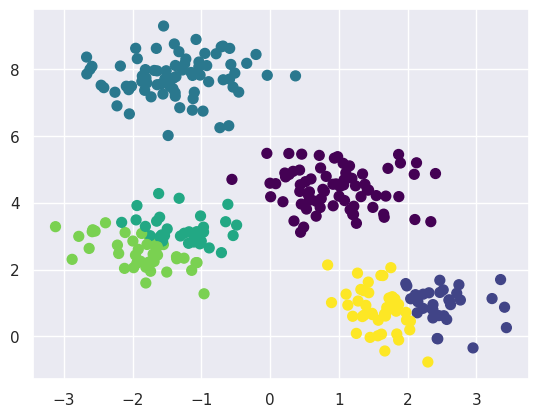

In [7]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

- labels = KMeans(6, random_state=0).fit_predict(X):

  - Membuat objek KMeans dengan 6 cluster dan random_state=0 untuk memastikan hasil yang konsisten.
  - fit_predict(X): Melakukan training model K-Means pada data X dan langsung memprediksi label cluster untuk setiap data point. Hasil prediksi (label cluster) disimpan dalam variabel labels.

- plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'):

  - Membuat scatter plot dari data points dalam X, dengan memberikan warna pada data points berdasarkan label cluster (labels).
  - c=labels: Memberikan warna pada data points berdasarkan label cluster.
  - s=50: Menentukan ukuran marker untuk data points menjadi 50.
  - cmap='viridis': Menentukan colormap yang digunakan untuk memetakan label cluster ke warna.

**Batas Klaster yang Tidak Selalu Linier**

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

- from sklearn.datasets import make_moons:

  - Mengimpor fungsi make_moons dari modul sklearn.datasets. Fungsi ini digunakan untuk menghasilkan dataset sintetis berbentuk dua bulan sabit yang saling terkait. Dataset ini sering digunakan untuk menguji algoritma clustering dan klasifikasi yang dapat menangani data non-linier.

- X, y = make_moons(200, noise=.05, random_state=0):

  - Memanggil fungsi make_moons untuk membuat dataset.
  - n_samples=200: Menentukan jumlah sampel data yang akan dihasilkan, yaitu 200.
  - noise=.05: Menentukan tingkat noise (variasi acak) yang ditambahkan ke data. Nilai yang lebih tinggi akan menghasilkan bulan sabit yang lebih "berisik" dan kurang jelas.
  - random_state=0: Menentukan seed untuk generator angka acak, sehingga dataset yang dihasilkan akan konsisten setiap kali kode dijalankan.
  - Fungsi make_moons mengembalikan dua nilai:
    - X: Array yang berisi data points, dengan setiap baris mewakili satu sampel dan setiap kolom mewakili satu fitur.
    - y: Array yang berisi label kelas sebenarnya untuk setiap sampel data (0 atau 1, sesuai dengan bulan sabit mana data point tersebut berada).

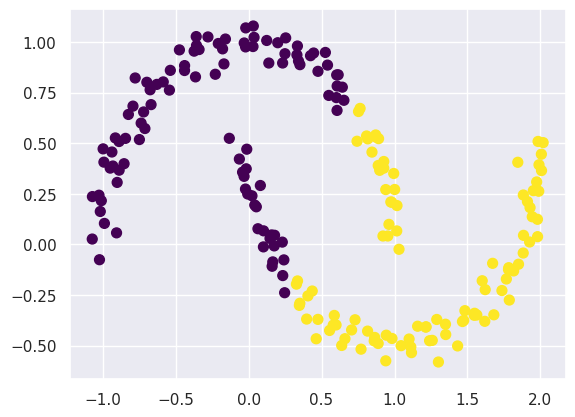

In [9]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

- labels = KMeans(2, random_state=0).fit_predict(X):

  - Membuat objek KMeans dengan 2 cluster dan random_state=0 untuk hasil yang konsisten.
  - fit_predict(X): Melatih model KMeans pada data X dan langsung memprediksi label cluster untuk setiap data point. Hasil prediksi (label cluster) disimpan dalam variabel labels.

- plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'):

  - Membuat scatter plot dari data points dalam X, dengan memberikan warna pada data points berdasarkan label cluster (labels).
  - c=labels: Memberikan warna pada data points berdasarkan label cluster.
  - s=50: Menentukan ukuran marker untuk data points menjadi 50.
  - cmap='viridis': Menentukan colormap yang digunakan untuk memetakan label cluster ke warna.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


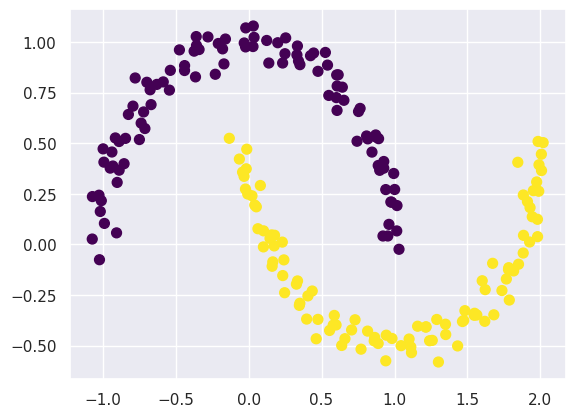

In [10]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

- from sklearn.cluster import SpectralClustering:

  - Mengimpor kelas SpectralClustering dari modul sklearn.cluster.SpectralClustering adalah algoritma clustering yang menggunakan representasi spektral dari data untuk melakukan pengelompokan. Algoritma ini lebih cocok untuk data non-linier seperti data berbentuk bulan sabit.

- model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans'):

  - Membuat objek SpectralClustering dengan parameter berikut:
  - n_clusters=2: Menentukan jumlah cluster yang diinginkan, yaitu 2.
  - affinity='nearest_neighbors': Menentukan metode untuk menghitung matriks affinity (kemiripan) antara data points. 'nearest_neighbors' menggunakan graf k-nearest neighbors untuk menghitung affinity.
  - assign_labels='kmeans': Menentukan metode untuk menetapkan label cluster setelah embedding spektral. 'kmeans' menggunakan algoritma KMeans untuk menetapkan label.

- labels = model.fit_predict(X):

  - Melakukan training model SpectralClustering pada data X dan langsung memprediksi label cluster untuk setiap data point. Hasil prediksi (label cluster) disimpan dalam variabel labels.

- plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'):

  - Membuat scatter plot dari data points dalam X, dengan memberikan warna pada data points berdasarkan label cluster (labels).
  - c=labels: Memberikan warna pada data points berdasarkan label cluster.
  - s=50: Menentukan ukuran marker untuk data points menjadi 50.
  - cmap='viridis': Menentukan colormap yang digunakan untuk memetakan label cluster ke warna.

**Contoh Kasus 1: Karakter Angka**

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

- from sklearn.datasets import load_digits:
  - Perintah ini mengimpor fungsi load_digits dari modul sklearn.datasets. Fungsi ini digunakan untuk memuat dataset digit tulisan tangan dari scikit-learn.

- digits = load_digits():
  - Perintah ini memanggil fungsi load_digits dan menyimpan dataset yang dimuat ke dalam variabel digits. Dataset ini berisi gambar digit tulisan tangan dalam bentuk array NumPy.

- digits.data.shape:
  - Perintah ini mengakses atribut data dari objek digits dan menampilkan bentuk (shape) dari array data. Atribut data berisi representasi matriks dari gambar digit, dan shape memberikan dimensi dari matriks tersebut.

In [12]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

- kmeans = KMeans(n_clusters=10, random_state=0):
  - Membuat objek KMeans dengan parameter:
    - n_clusters=10: Menentukan jumlah cluster yang diinginkan, yaitu 10 (sesuai dengan jumlah digit 0-9).
    - random_state=0: Menentukan seed untuk generator angka acak, sehingga hasil clustering konsisten.

- clusters = kmeans.fit_predict(digits.data):
  - Melakukan training model K-Means pada data digits.data (gambar digit) dan langsung memprediksi label cluster untuk setiap data point.
  - Hasil prediksi (label cluster) disimpan dalam variabel clusters.

- kmeans.cluster_centers_.shape:

  - Mengakses atribut cluster_centers_ dari objek kmeans dan menampilkan bentuk (shape) dari array centroid cluster.
  - cluster_centers_ berisi koordinat centroid untuk setiap cluster.

Output dari kmeans.cluster_centers_.shape akan berupa tuple (10, 64), yang menunjukkan bahwa ada 10 centroid (satu untuk setiap cluster) dan setiap centroid direpresentasikan sebagai array 64 elemen (8x8 piksel).

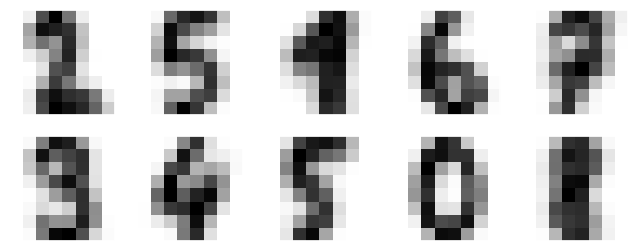

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

- fig, ax = plt.subplots(2, 5, figsize=(8, 3)):

  - Membuat figure dan axes untuk plotting.
  - plt.subplots(2, 5) membuat grid 2x5 subplot (total 10 subplot).
  - figsize=(8, 3) menentukan ukuran figure (lebar 8 inci, tinggi 3 inci).

- centers = kmeans.cluster_centers_.reshape(10, 8, 8):

  - Mengambil centroid cluster dari objek kmeans (kmeans.cluster_centers_).
  - reshape(10, 8, 8) mengubah bentuk array centroid menjadi 10 gambar 8x8 piksel.

- for axi, center in zip(ax.flat, centers)::

  - Melakukan iterasi melalui setiap subplot (ax.flat) dan centroid cluster (centers).

- axi.set(xticks=[], yticks=[]):

  - Menghilangkan ticks (tanda) pada sumbu x dan y subplot.

- axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary):

  - Menampilkan gambar centroid cluster pada subplot.
  - interpolation='nearest' menggunakan interpolasi nearest-neighbor untuk menampilkan gambar.
  - cmap=plt.cm.binary menggunakan colormap biner (hitam-putih) untuk gambar.

In [14]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

- from scipy.stats import mode:

  - Mengimpor fungsi mode dari modul scipy.stats. Fungsi ini digunakan untuk mencari modus (nilai yang paling sering muncul) dalam suatu array.

- labels = np.zeros_like(clusters):

  - Membuat array labels dengan ukuran dan tipe data yang sama dengan clusters, dan menginisialisasi semua elemennya dengan 0. Array ini akan digunakan untuk menyimpan label digit yang ditetapkan untuk setiap cluster.

- for i in range(10)::

  - Melakukan iterasi melalui setiap cluster (0-9).

- mask = (clusters == i):

  - Membuat array boolean mask yang bernilai True untuk elemen-elemen dalam clusters yang sama dengan i (label cluster saat ini), dan False untuk yang lainnya.

- labels[mask] = mode(digits.target[mask])[0]:

  - Mencari modus dari label digit sebenarnya (digits.target) untuk data point yang termasuk dalam cluster saat ini (menggunakan mask).
  - Modus tersebut kemudian ditetapkan sebagai label untuk semua data point dalam cluster tersebut (menggunakan labels[mask]).

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

- from sklearn.metrics import accuracy_score:

  - Mengimpor fungsi accuracy_score dari modul sklearn.metrics. Fungsi ini digunakan untuk menghitung akurasi dari model klasifikasi.

- accuracy_score(digits.target, labels):

  - Memanggil fungsi accuracy_score dengan dua argumen:
    - digits.target: Label digit sebenarnya dari dataset.
    - labels: Label digit yang diprediksi oleh model K-Means (setelah diubah dari label cluster).

Fungsi ini akan membandingkan kedua array tersebut dan menghitung rasio jumlah prediksi yang benar terhadap total jumlah data point.

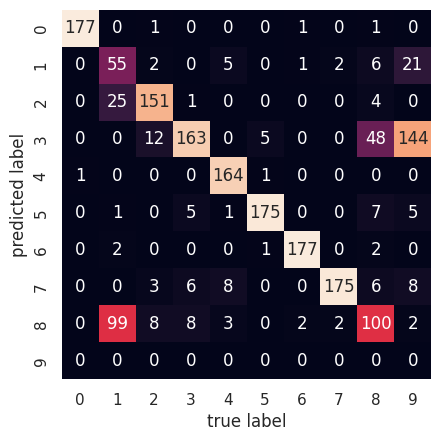

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

- from sklearn.metrics import confusion_matrix:

  - Mengimpor fungsi confusion_matrix dari modul sklearn.metrics. Fungsi ini digunakan untuk membuat confusion matrix dari model klasifikasi.

- mat = confusion_matrix(digits.target, labels):

  - Memanggil fungsi confusion_matrix dengan dua argumen:
    - digits.target: Label digit sebenarnya dari dataset.
    - labels: Label digit yang diprediksi oleh model K-Means.
  - Fungsi ini akan membuat confusion matrix yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas (digit).

- sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names):

  - Menggunakan fungsi heatmap dari library Seaborn untuk memvisualisasikan confusion matrix.
  - mat.T: Menggunakan transpose dari confusion matrix agar label sebenarnya ditampilkan di sumbu x dan label yang diprediksi di sumbu y.
  - square=True: Membuat heatmap berbentuk persegi.
  - annot=True: Menampilkan angka di dalam setiap sel heatmap.
  - fmt='d' : Menentukan format angka sebagai integer.
  - cbar=False: Menghilangkan colorbar.
  - xticklabels=digits.target_names dan yticklabels=digits.target_names: Menggunakan nama digit sebagai label untuk sumbu x dan y.

- plt.xlabel('true label') dan plt.ylabel('predicted label'):

  - Memberikan label pada sumbu x dan y.

In [17]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

- from sklearn.manifold import TSNE:

  - Mengimpor kelas TSNE dari modul sklearn.manifold. TSNE digunakan untuk reduksi dimensi dengan teknik t-distributed Stochastic Neighbor Embedding.

- tsne = TSNE(n_components=2, init='random', random_state=0):

  - Membuat objek TSNE dengan parameter:
    - n_components=2: Mereduksi dimensi data menjadi 2 dimensi.
    - init='random': Menginisialisasi embedding secara acak.
    - random_state=0: Menentukan seed untuk hasil yang konsisten.

- digits_proj = tsne.fit_transform(digits.data):

  - Melakukan reduksi dimensi pada data digits.data menggunakan t-SNE dan menyimpan hasilnya dalam digits_proj.

- kmeans = KMeans(n_clusters=10, random_state=0):

  - Membuat objek KMeans dengan 10 cluster dan random_state=0.

- clusters = kmeans.fit_predict(digits_proj):

  - Menerapkan K-Means pada data yang telah direduksi dimensinya (digits_proj) dan menyimpan label cluster dalam clusters.

- labels = np.zeros_like(clusters): Membuat array labels dengan ukuran dan tipe data yang sama dengan clusters, dan menginisialisasi semua elemennya dengan 0. Array ini akan digunakan untuk menyimpan label digit yang ditetapkan untuk setiap cluster.

- for i in range(10):: Melakukan iterasi melalui setiap cluster (0-9).

- mask = (clusters == i): Membuat array boolean mask yang bernilai True untuk elemen-elemen dalam clusters yang sama dengan i (label cluster saat ini), dan False untuk yang lainnya.

- labels[mask] = mode(digits.target[mask])[0]: Mencari modus (nilai yang paling sering muncul) dari label digit sebenarnya (digits.target) untuk data point yang termasuk dalam cluster saat ini (menggunakan mask). Modus tersebut kemudian ditetapkan sebagai label untuk semua data point dalam cluster tersebut (menggunakan labels[mask]).

- accuracy_score(digits.target, labels): Memanggil fungsi accuracy_score dari scikit-learn dengan dua argumen:
digits.target: Label digit sebenarnya dari dataset.
labels: Label digit yang diprediksi oleh model K-Means (setelah diubah dari label cluster).

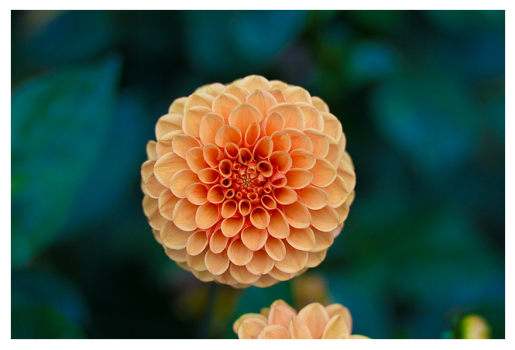

In [18]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

- from sklearn.datasets import load_sample_image:

  Mengimpor fungsi load_sample_image dari modul sklearn.datasets. Fungsi ini digunakan untuk memuat gambar contoh yang disertakan dalam scikit-learn.

- flower = load_sample_image("flower.jpg"):

  Memanggil fungsi load_sample_image dengan nama file gambar "flower.jpg" dan menyimpan gambar yang dimuat ke dalam variabel flower.

- ax = plt.axes(xticks=[], yticks=[]):

  Membuat objek axes menggunakan plt.axes dan mengatur xticks dan yticks menjadi kosong untuk menghilangkan tanda sumbu pada plot.

- ax.imshow(flower):

  Menampilkan gambar flower menggunakan fungsi imshow pada objek axes.

In [19]:
flower.shape

(427, 640, 3)

- flower.shape:

  - flower: Ini adalah variabel yang menyimpan gambar yang telah dimuat menggunakan load_sample_image("flower.jpg").
  - .shape: Ini adalah atribut dari array NumPy yang menyimpan gambar. Atribut ini mengembalikan tuple yang berisi dimensi dari array.

In [20]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

- data = flower / 255.0:

  - Baris ini melakukan normalisasi pada data gambar flower.
  - Setiap nilai piksel dalam gambar (yang awalnya berkisar antara 0-255) dibagi dengan 255.0.
  - Hasilnya, nilai piksel akan berada dalam rentang 0.0 hingga 1.0.

- data = data.reshape(427 * 640, 3):

  - Baris ini mengubah bentuk (reshape) array data.
  - Awalnya, data memiliki bentuk (427, 640, 3), yang merepresentasikan gambar dengan tinggi 427 piksel, lebar 640 piksel, dan 3 channel warna.
  - Setelah di-reshape, data akan memiliki bentuk (427 * 640, 3), yang berarti array tersebut sekarang berisi 427 * 640 baris dan 3 kolom.

- data.shape:

  - Baris ini menampilkan bentuk (shape) dari array data setelah di-reshape.

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

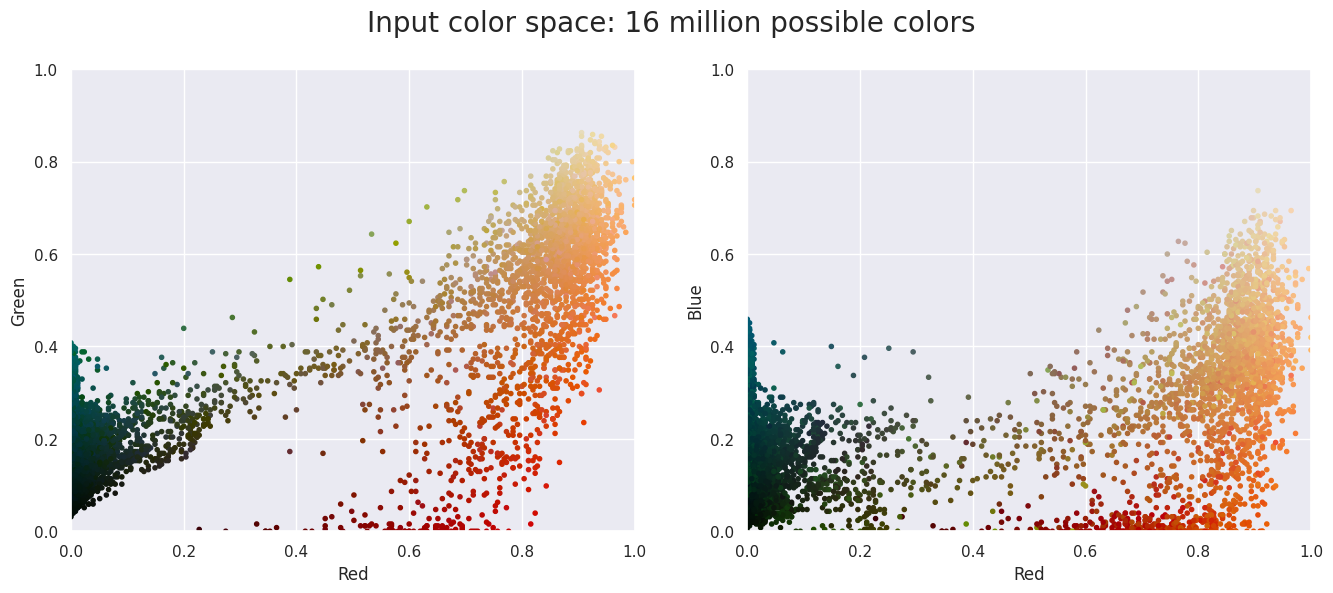

In [22]:
plot_pixels(data, title='Input color space: 16 million possible colors')

- rng = np.random.RandomState(0)

  i = rng.permutation(data.shape[0])[:N]
  - Membuat instance RandomState untuk memastikan hasil acak yang dapat direproduksi (random seed = 0).
  - rng.permutation(data.shape[0])[:N] memilih secara acak N pixel dari data.

- R, G, B = data[i].T
  - Pixel yang dipilih (baris ke-i) kemudian dibagi menjadi tiga channel: R (merah), G (hijau), dan B (biru), menggunakan transpose (.T).

- fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  - Membuat dua subplot berdampingan dengan ukuran gambar 16x6 inci.

- ax[0].scatter(R, G, color=colors, marker='.')

  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
  - Plot pertama (kiri) memplot channel merah (R) di sumbu x dan hijau (G) di sumbu y.
  - Batas sumbu x dan y diatur dari 0 sampai 1 untuk representasi nilai normalisasi RGB.

- ax[1].scatter(R, B, color=colors, marker='.')

  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
  - Plot kedua (kanan) memplot channel merah (R) di sumbu x dan biru (B) di sumbu y, dengan parameter yang sama.

- fig.suptitle(title, size=20)
  - Menambahkan judul grafik yang besar dengan ukuran font 20.

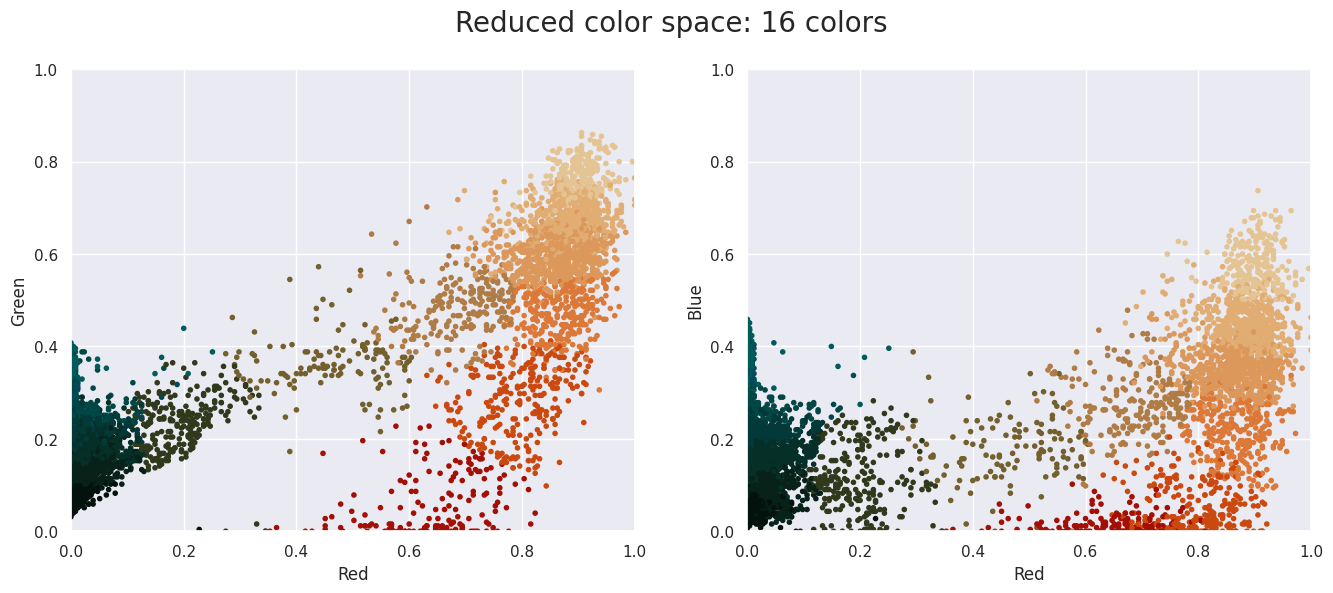

In [23]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

- import warnings; warnings.simplefilter('ignore'):
  - Mengimpor modul warnings untuk mengelola peringatan.
  - warnings.simplefilter('ignore'): Menonaktifkan peringatan NumPy yang mungkin muncul selama eksekusi kode.

- from sklearn.cluster import MiniBatchKMeans:
  - Mengimpor kelas MiniBatchKMeans dari modul sklearn.cluster.
  - MiniBatchKMeans adalah varian dari algoritma K-Means yang lebih efisien untuk dataset besar.

- kmeans = MiniBatchKMeans(16):
  - Membuat objek MiniBatchKMeans dengan 16 cluster.
  - Ini berarti algoritma akan mengelompokkan piksel gambar ke dalam 16 cluster warna.
- kmeans.fit(data):
  - Melatih model K-Means pada data gambar yang telah dinormalisasi dan di-reshape (data).
  - Proses ini menghitung centroid (pusat) dari 16 cluster warna.

- new_colors = kmeans.cluster_centers_[kmeans.predict(data)]:
  - Memprediksi label cluster untuk setiap piksel dalam gambar menggunakan model K-Means yang telah dilatih.
  - kmeans.predict(data) mengembalikan label cluster untuk setiap piksel.
  - kmeans.cluster_centers_ berisi warna centroid untuk setiap cluster.
  - new_colors akan berisi warna baru untuk setiap piksel, yang diambil dari centroid cluster yang sesuai.

- plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors"):
  - Memanggil fungsi plot_pixels (yang telah didefinisikan sebelumnya) untuk memvisualisasikan gambar dengan warna yang telah dikurangi.
  - data: Data gambar asli.
  - colors=new_colors: Warna baru untuk setiap piksel.
  - title: Judul plot.

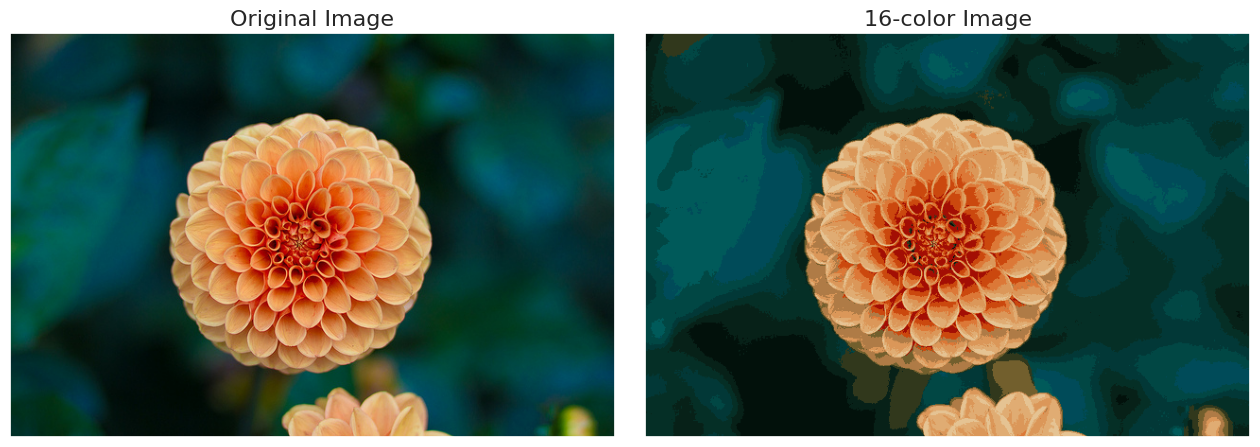

In [24]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

- flower_recolored = new_colors.reshape(flower.shape):
  - Mengubah bentuk array new_colors (yang berisi warna baru untuk setiap piksel) agar sesuai dengan bentuk asli gambar (flower.shape).
  - Ini akan menghasilkan gambar baru (flower_recolored) dengan warna yang telah dikurangi.

- fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[])):
  - Membuat figure dan axes untuk plotting.
  - plt.subplots(1, 2) membuat 2 subplot dalam satu baris.
  - figsize=(16, 6) menentukan ukuran figure (lebar 16 inci, tinggi 6 inci).
  - subplot_kw=dict(xticks=[], yticks=[]) menghilangkan ticks (tanda) pada sumbu x dan y dari kedua subplot.

- fig.subplots_adjust(wspace=0.05):
  - Menyesuaikan jarak horizontal antara subplot.
  - wspace=0.05 memberikan jarak yang sangat kecil antara subplot.

- ax[0].imshow(flower):
  - Menampilkan gambar asli (flower) pada subplot pertama (ax[0]).

- ax[0].set_title('Original Image', size=16):
  - Memberikan judul 'Original Image' pada subplot pertama dengan ukuran font 16.

- ax[1].imshow(flower_recolored):
  - Menampilkan gambar yang telah dikurangi warnanya (flower_recolored) pada subplot kedua (ax[1]).

- ax[1].set_title('16-color Image', size=16):
  - Memberikan judul '16-color Image' pada subplot kedua dengan ukuran font 16.

# Praktikum 3

Self-optimizing Map (SOM)

Contoh penerapan Self-Organizing Map (SOM) untuk klaterisasi menggunakan library SOMPY. Sebelum memulai, pastikan Anda telah menginstal library SOMPY. JIka dalam library tidak ditemukan SOMPY bisa menggunakan minisom. Dalam Praktikum ini akan menggunakan library MiniSom untuk implementasi SOM dengan ukuran yang lebih kecil.

instalasi SOM

In [25]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=01d99f87d45a73e558adff439ce4e09a5798c1295dcf5dd238f5cee280f93e0d
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [26]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

- from minisom import MiniSom:
  - Mengimpor kelas MiniSom dari library minisom.
  - MiniSom adalah implementasi dari algoritma SOM yang akan digunakan untuk mengelompokkan data.

- import numpy as np:
  - Mengimpor library numpy dan memberikan alias np.
  - numpy digunakan untuk operasi numerik dan array multidimensi, yang penting untuk bekerja dengan data dalam SOM.

- import matplotlib.pyplot as plt:
  - Mengimpor modul pyplot dari library matplotlib dan memberikan alias plt.
  - matplotlib.pyplot digunakan untuk membuat visualisasi data, seperti plot SOM.

- from sklearn import datasets:
  - Mengimpor modul datasets dari library sklearn (scikit-learn).
  - sklearn.datasets menyediakan akses ke berbagai dataset bawaan, yang dapat digunakan untuk menguji dan mendemonstrasikan SOM.

Gunakan dataset Iris sebagai contoh

In [27]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

- iris = datasets.load_iris():
  - Memanggil fungsi load_iris() dari modul datasets (yang telah diimpor sebelumnya) untuk memuat dataset Iris.
  - Hasil pemanggilan fungsi load_iris() disimpan dalam variabel iris.

- data = iris.data:
  - Mengakses atribut data dari objek iris dan menyimpannya dalam variabel data.


Normalisasi dataset agar nilainya berada dalam rentang yang seragam.

In [28]:
# Normalisasi data
data = data / data.max(axis=0)

- data.max(axis=0):
  - Menghitung nilai maksimum untuk setiap fitur (kolom) dalam dataset data.
  - axis=0 menentukan bahwa operasi maksimum dilakukan di sepanjang kolom (sumbu 0).
  - Hasilnya adalah array 1 dimensi yang berisi nilai maksimum untuk setiap fitur.

- data / data.max(axis=0):
  - Membagi setiap nilai fitur dalam dataset data dengan nilai maksimum yang sesuai untuk fitur tersebut.
  - Ini akan menormalisasi data fitur ke rentang 0-1, di mana nilai 0 menunjukkan nilai minimum dan nilai 1 menunjukkan nilai maksimum.

Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM

In [29]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

- map_size = (10, 10):
  - Mendefinisikan ukuran grid SOM sebagai tuple (10, 10).
  - Ini berarti grid SOM akan memiliki 10 baris dan 10 kolom, sehingga total ada 100 neuron.

- som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5):
  - Membuat objek MiniSom dengan parameter berikut:
    - map_size[0]: Jumlah baris grid SOM (10).
    - map_size[1]: Jumlah kolom grid SOM (10).
    - data.shape[1]: Jumlah fitur input (4, karena dataset Iris memiliki 4 fitur).
    - sigma=0.5: Radius lingkungan awal.
    - learning_rate=0.5: Learning rate awal.

Inisialisasi bobot SOM secara acak.

In [30]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

- som.random_weights_init(data):
  - Memanggil metode random_weights_init dari objek som untuk menginisialisasi bobot neuron SOM.
  - Metode ini mengambil data fitur yang telah dinormalisasi (data) sebagai argumen.
  - Bobot neuron akan diinisialisasi dengan nilai acak yang diambil dari data fitur.

Melatih SOM dengan data menggunakan metode train_random.

In [31]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

- num_epochs = 100:
  - Mendefinisikan jumlah epoch (iterasi pelatihan) sebagai 100.

- som.train_random(data, num_epochs):
  - Memanggil metode train_random dari objek som untuk melatih model SOM.
  - Metode ini mengambil data fitur yang telah dinormalisasi (data) dan jumlah epoch (num_epochs) sebagai argumen.
  - Selama pelatihan, SOM akan secara iteratif menyesuaikan bobot neuron agar sesuai dengan data input.
  - Metode train_random memilih sampel data secara acak dari dataset untuk setiap iterasi pelatihan.

Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

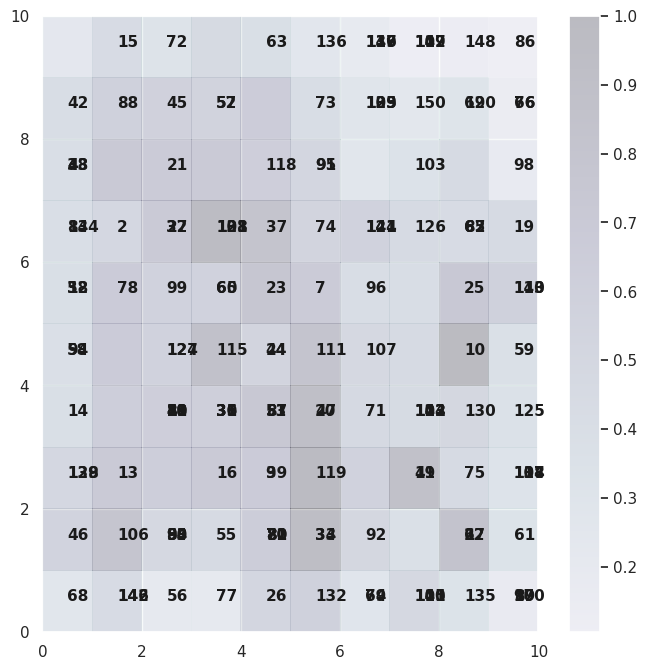

In [32]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

- plt.figure(figsize=(8, 8)):
  - Membuat figure baru dengan ukuran 8x8 inci.

- for i, x in enumerate(data)::
  - Melakukan iterasi melalui setiap sampel data (x) dalam dataset data beserta indeksnya (i).

- w = som.winner(x):
  - Menemukan neuron pemenang (Best Matching Unit/BMU) untuk sampel data x menggunakan metode winner dari objek som.
  - Neuron pemenang adalah neuron pada grid SOM yang memiliki bobot paling mirip dengan sampel data.

- plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11}):
  - Menambahkan teks (nomor indeks sampel data) pada posisi neuron pemenang pada grid SOM.
  - w[0]+.5 dan w[1]+.5 digunakan untuk memposisikan teks di tengah neuron.

- plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2):
  - Membuat plot peta jarak SOM menggunakan metode distance_map dari objek som.
  - Peta jarak menunjukkan jarak antara neuron pada grid SOM.
  - cmap='bone_r' menggunakan colormap bone_r untuk mewarnai peta jarak.
  - alpha=.2 mengatur transparansi peta jarak.

- plt.colorbar():
  - Menambahkan colorbar ke plot untuk menunjukkan skala warna peta jarak.

- plt.show():
  - Menampilkan plot.

# Praktikum 4

Penerapan metode Self-Organizing Map (SOM) untuk segmentasi citra Lenna.

instalasi minisom

In [33]:
pip install minisom

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

- import numpy as np:
  - Mengimpor library NumPy dan memberikan alias np.
  - NumPy digunakan untuk operasi numerik dan array multidimensi, yang penting untuk bekerja dengan data gambar.

- import matplotlib.pyplot as plt:
  - Mengimpor modul pyplot dari library Matplotlib dan memberikan alias plt.
  - matplotlib.pyplot digunakan untuk membuat visualisasi data, seperti menampilkan gambar.

- from skimage import io:
  - Mengimpor modul io dari library scikit-image.
  - skimage.io menyediakan fungsi untuk membaca dan menulis gambar dalam berbagai format.

In [35]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

- def initialize_weights(input_shape, output_shape)::
 - Mendefinisikan fungsi bernama initialize_weights yang menerima dua argumen:
    - input_shape: Tuple yang berisi dimensi dari data input, misalnya (tinggi, lebar, channels).
    - output_shape: Tuple yang berisi dimensi dari grid SOM, misalnya (jumlah_baris, jumlah_kolom).

- return np.random.rand(output_shape[0], output_shape[1], input_shape[2]):
  - Membuat array NumPy dengan dimensi yang sesuai dengan grid SOM dan jumlah channels input.
  - np.random.rand digunakan untuk mengisi array dengan nilai acak antara 0 dan 1.
  - Array ini merepresentasikan bobot SOM, di mana setiap elemen array sesuai dengan bobot dari satu neuron pada grid SOM untuk satu channel input.

In [36]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)


- def calculate_distance(input_vector, weights)::
  - Mendefinisikan fungsi bernama calculate_distance yang menerima dua argumen:
  - input_vector: Vektor input yang akan dihitung jaraknya.
  - weights: Bobot dari semua neuron pada grid SOM.

- return np.linalg.norm(input_vector - weights, axis=2):
  - Menghitung jarak Euclidean antara input_vector dan weights menggunakan fungsi np.linalg.norm.
  - input_vector - weights menghitung selisih antara vektor input dan bobot dari setiap neuron.
  - axis=2 menentukan bahwa operasi norm (jarak Euclidean) dihitung di sepanjang sumbu terakhir (sumbu channels dalam kasus gambar).
  - Fungsi ini mengembalikan matriks jarak, di mana setiap elemen matriks merepresentasikan jarak antara vektor input dan bobot dari satu neuron pada grid SOM.

In [37]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

- def find_winner_unit_in_image(input_vector, weights)::
  - Mendefinisikan fungsi bernama find_winner_unit_in_image yang menerima dua argumen:
  - input_vector: Vektor input yang akan dicari neuron pemenangnya.
  - weights: Bobot dari semua neuron pada grid SOM.

- distances = calculate_distance(input_vector, weights):
  - Memanggil fungsi calculate_distance (yang telah didefinisikan sebelumnya) untuk menghitung jarak antara vektor input dan bobot dari setiap neuron pada grid SOM.
  - Hasilnya disimpan dalam variabel distances.

- return np.unravel_index(np.argmin(distances), distances.shape):
  - Menemukan indeks dari neuron pemenang menggunakan fungsi np.argmin dan np.unravel_index.
  - np.argmin(distances) mengembalikan indeks elemen minimum dalam array distances (yaitu, jarak minimum).
  - np.unravel_index mengkonversi indeks elemen minimum menjadi indeks baris dan kolom pada grid SOM, berdasarkan bentuk (shape) dari distances.
  - Fungsi ini mengembalikan tuple yang berisi indeks baris dan kolom dari neuron pemenang.

In [38]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

- def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)::
  - Mendefinisikan fungsi bernama update_weights yang menerima lima argumen:
    - input_vector: Vektor input yang digunakan untuk memperbarui bobot.
    - weights: Bobot dari semua neuron pada grid SOM.
    - winner: Indeks dari neuron pemenang (BMU).
    - learning_rate: Nilai learning rate yang mengontrol seberapa besar bobot akan diperbarui.
    - neighborhood_radius: Radius lingkungan yang menentukan seberapa banyak neuron di sekitar neuron pemenang yang akan diperbarui.

- distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2):
  - Menghitung jarak antara setiap neuron pada grid SOM dengan neuron pemenang.
  - np.indices(weights.shape[:2]).T menghasilkan matriks koordinat dari semua neuron pada grid.
  - np.array(winner).reshape(1, -1) mengubah indeks neuron pemenang menjadi array 2D.
  - np.linalg.norm(..., axis=2) menghitung jarak Euclidean antara koordinat neuron dan koordinat neuron pemenang.

- `influence = np.exp(-distances / (2 * neighborhood_radius2))`**:
  - Menghitung pengaruh dari neuron pemenang terhadap neuron-neuron lainnya berdasarkan jarak.
  - Fungsi Gaussian digunakan untuk menghitung pengaruh, di mana neuron yang lebih dekat dengan neuron pemenang akan memiliki pengaruh yang lebih besar.

- weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights):
  - Memperbarui bobot dari neuron-neuron pada grid SOM.
  - learning_rate * influence[:, :, np.newaxis] menghitung perubahan bobot berdasarkan learning rate dan pengaruh.
  - (input_vector - weights) menghitung perbedaan antara vektor input dan bobot neuron.
  - Bobot neuron diperbarui dengan menambahkan perubahan bobot ke bobot neuron saat ini.

In [39]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

- def train_som()
  - image: Gambar input yang akan digunakan untuk melatih SOM. Gambar ini berbentuk array dengan dimensi (tinggi, lebar, saluran warna), seperti gambar RGB.
  - num_epochs: Jumlah epoch pelatihan, yaitu berapa kali proses pembelajaran akan dilakukan.
  - initial_learning_rate: Tingkat pembelajaran awal yang digunakan untuk memperbarui bobot SOM selama pelatihan.
  - initial_neighborhood_radius: Radius tetangga awal, digunakan untuk menentukan seberapa banyak unit SOM di sekitar neuron pemenang yang akan diperbarui selama pelatihan.

- input_shape = image.shape
  
  som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
  
  weights = initialize_weights(input_shape, som_shape)
  
  - input_shape: Dimensi dari gambar input. Misalnya, jika gambar berukuran 100x100 dengan 3 saluran (RGB), maka input_shape akan bernilai (100, 100, 3).
  - som_shape: Ukuran SOM yang diinisialisasi dengan bentuk (10, 10, 3), yang artinya SOM akan memiliki 10x10 neuron dan setiap neuron memiliki 3 bobot yang sesuai dengan saluran warna.
  - initialize_weights: Fungsi yang belum ditunjukkan di sini, tetapi diasumsikan digunakan untuk menginisialisasi bobot SOM secara acak.

- for epoch in range(num_epochs):

    learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
    
    neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)

  - Loop epoch untuk mengulang proses pembelajaran dalam beberapa iterasi.
  - Loop untuk mengakses setiap pixel dalam gambar.

- for i in range(input_shape[0]):

    for j in range(input_shape[1]):

        input_vector = image[i, j, :]

        winner = find_winner_unit_in_image(input_vector, weights)

        update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

  - input_vector = image[i, j, :]: Vektor input berupa nilai warna dari pixel (i, j) pada gambar.
  - find_winner_unit_in_image(input_vector, weights): Fungsi untuk menemukan unit pemenang (Best Matching Unit, BMU) di SOM, yaitu neuron yang paling mirip dengan vektor input (pixel).
  - update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius): Fungsi ini memperbarui bobot neuron pemenang dan neuron-neuron tetangganya sesuai dengan learning rate dan neighborhood radius yang sudah diperbarui.

- return weights
  - Setelah proses pelatihan selesai, fungsi ini mengembalikan bobot SOM yang telah diperbarui.

In [40]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "/content/drive/MyDrive/machine learning/Lenna_(test_image).png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

- Lenna = io.imread(Lenna_path) / 255.0:
  - Membaca gambar Lenna menggunakan fungsi io.imread dari library skimage.io.
  - io.imread(Lenna_path) membaca gambar dari path yang ditentukan dan menyimpannya dalam variabel Lenna sebagai array NumPy.
  - / 255.0 membagi setiap nilai piksel dalam array gambar dengan 255.0 untuk menormalisasi intensitas piksel menjadi rentang [0, 1].

In [41]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

- num_epochs = 100:
  - Menentukan jumlah epoch (iterasi pelatihan) untuk SOM sebagai 100.

- initial_learning_rate = 0.1:
  - Menentukan learning rate awal untuk SOM sebagai 0.1. Learning rate mengontrol seberapa besar bobot neuron akan diperbarui selama pelatihan.

- initial_neighborhood_radius = 5:
  - Menentukan radius lingkungan awal untuk SOM sebagai 5. Radius lingkungan menentukan seberapa banyak neuron di sekitar neuron pemenang (BMU) yang akan diperbarui selama pelatihan.

- trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius):
  - Memanggil fungsi train_som (diasumsikan telah didefinisikan sebelumnya) untuk melatih SOM.
  - Fungsi train_som menerima gambar Lenna, jumlah epoch, learning rate awal, dan radius lingkungan awal sebagai input.
  - Fungsi train_som mengembalikan bobot SOM yang telah dilatih, yang disimpan dalam variabel trained_weights.

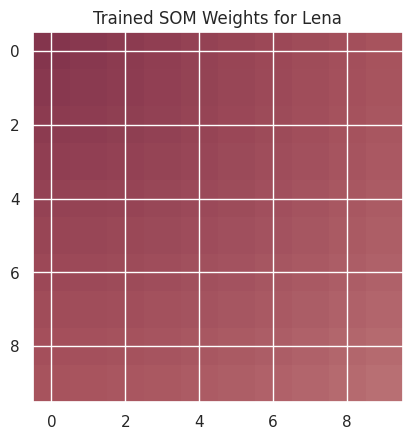

In [43]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

- plt.imshow(trained_weights):
  - Fungsi imshow dari Matplotlib digunakan untuk menampilkan array trained_weights sebagai gambar.
  - trained_weights diasumsikan berisi bobot dari neuron-neuron dalam SOM setelah proses pelatihan.
  - Setiap neuron dalam SOM biasanya dipetakan ke suatu warna atau intensitas, dan imshow akan menampilkan peta ini sebagai gambar.

- plt.title('Trained SOM Weights for Lena'):
  - Menambahkan judul "Trained SOM Weights for Lena" pada plot gambar.
- plt.show():
  - Menampilkan plot gambar yang telah dibuat.

# Tugas Praktikum

**Tugas**

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [42]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/machine learning/js7/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


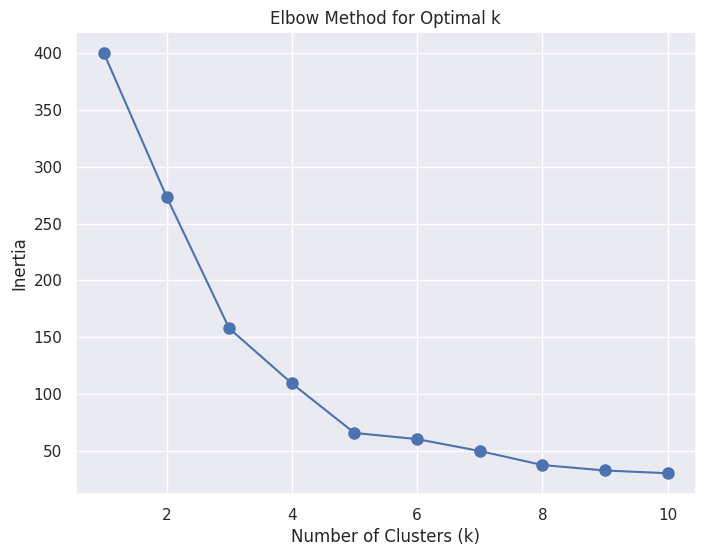

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [46]:
# Create KMeans model with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Show the first few rows with the cluster labels
df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


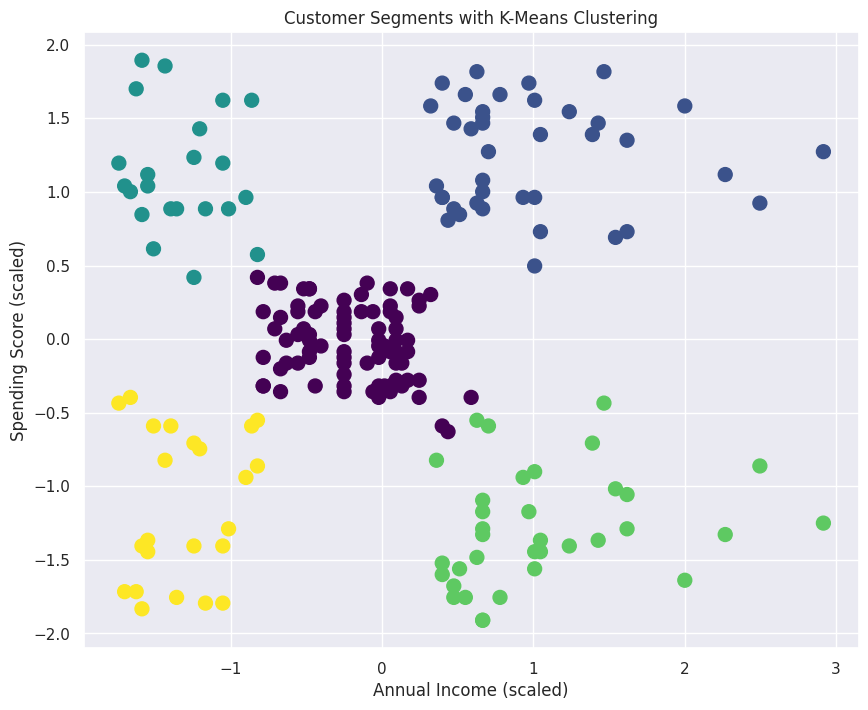

In [50]:
# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments with K-Means Clustering')
plt.grid(True)
plt.show()


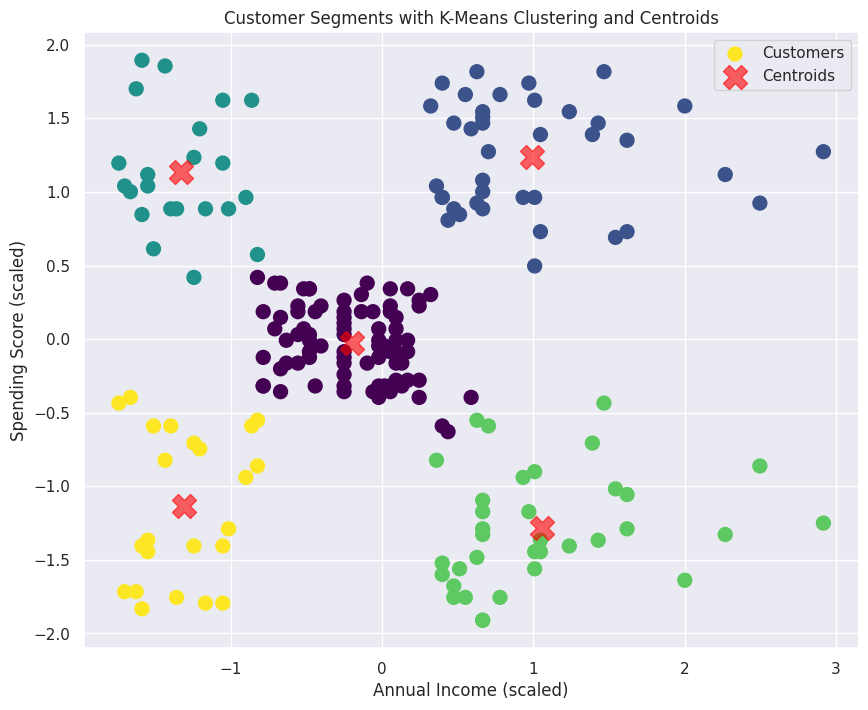

In [52]:
# Visualizing the clusters with centroids
plt.figure(figsize=(10, 8))

# Scatter plot for the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=100, label='Customers')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, alpha=0.6, marker='X', label='Centroids')

# Labels and title
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments with K-Means Clustering and Centroids')
plt.grid(True)
plt.legend()
plt.show()


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [54]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [55]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [56]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [57]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [58]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [59]:
# Load citra female (Anda bisa mengganti ini dengan citra lain jika diperlukan)
female_path = "/content/drive/MyDrive/PCVK/female.tiff"
female = io.imread(female_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [61]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(female, num_epochs, initial_learning_rate, initial_neighborhood_radius)

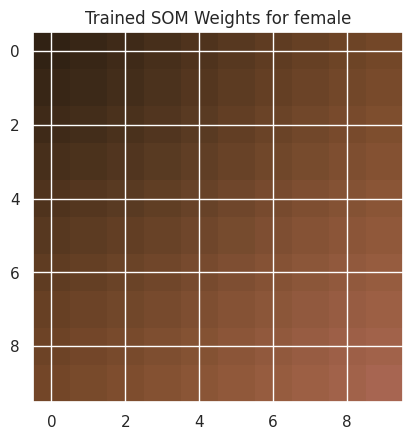

In [64]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for female')
plt.show()